In [35]:
#Import Modules
import os
import sys
import numpy as np
import keras
from keras.layers import *
from keras.optimizers import *
from keras.models import *
from keras.regularizers import *
from IPython.display import Image
from matplotlib import pyplot as plt



In [36]:
#Getting training data and creating X,Y
with open('training.csv','r')as f:
        lines=f.readlines()
Y=[]
features=lines.pop(0)
X=[]
for eachline in lines:
    temp1=str.split(eachline,',')
    temp2=temp1[0:30]
    Y.append(temp2)
    temp3=str.split(temp1[30],' ')
    X.append(temp3)
    

In [37]:

X=np.array(X)
Y=np.array(Y)
X=X.astype('float')

#--------------------Fill missing Values in gicen data by using AVERAGES-------------------------------#
# avg=np.zeros(30)
# nums=np.zeros(30)
# for i in range(len(Y)):
#     for j in range(len(Y[i])):
#         if(Y[i][j]):
#                    avg[j]=avg[j]+(float)(Y[i][j])
#                    nums[j]=nums[j]+1
# avg=np.divide(avg,nums)
#print avg
X_final=[]
Y_final=[]
for i in range(len(Y)):
    flag=0
    for j in range(len(Y[i])):
        if(Y[i][j]==""):
            flag=1
            break
    if(flag==0):
        X_final.append(X[i])
        Y_final.append(Y[i])


In [38]:
#--------------------Data has lot of missing Points-----------------------------------------#
#-----------------Using average to fill them is reducing accuracy---------------------------#

# X_final and Y_final are arrays which do not have those data where the keypoints are missing

print np.shape(X_final)
print np.shape(Y_final)

X_final=np.array(X_final)
Y_final=np.array(Y_final)
X_final=X_final.astype('float')
Y_final=Y_final.astype('float')


(2140, 9216)
(2140, 30)


In [39]:
#----------X_new is the input data to the MODEL--------------#
X_new=[]
for eachimage in X_final:
    temp=np.reshape(eachimage,(96,96,1))
    X_new.append(temp)
X_new=np.array(X_new)
X_new=X_new.astype('float')

print np.shape(X_new)
print np.shape(Y_final)

(2140, 96, 96, 1)
(2140, 30)


In [32]:
#----------------------------Data modification for UNET ARCHITECTURE------------------------------#


# points=np.zeros((len(X_new),96,96,15))
# #import math
# for i in range(len(X_new)):
#     for j in range(0,30,2):
#         a=int(Y_final[i][j])
#         b=int(Y_final[i][j+1])
#         points[i][a][b][j/2]=255



(96, 96)


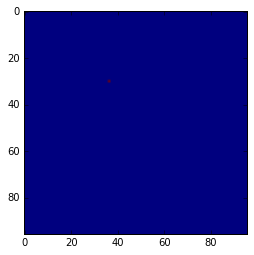

In [47]:
# temps=points[0]
# l=temps[:,:,1]
# print np.shape(l)
# plt.imshow(l)

In [34]:
# print np.shape(X)
# print np.shape(Y)
# print np.shape(points)

(7049, 9216)
(7049, 30)
(2140, 96, 96, 15)


In [40]:
def generator_model():

    
    #---------------------------MODEL SUBMITTED FOR THE CONTEST--------------------------#

    input_image1=Input(shape=(96,96,1))
    input_image=BatchNormalization()(input_image1)
    conv1_32 = Conv2D(8,kernel_size=(3,3),padding='same',activation='relu',kernel_regularizer=l2(0.001))(input_image)
    conv1_32 = BatchNormalization()(conv1_32)
    
    conv2_64 = Conv2D(16,kernel_size=(3,3),padding='same',activation='relu',kernel_regularizer=l2(0.001))(conv1_32)
    conv2_64 = Conv2D(16,kernel_size=(3,3),activation='relu',padding='same',kernel_regularizer=l2(0.001))(conv2_64)    
    conv2_64 = AveragePooling2D(pool_size=(2,2),strides=2,padding="same")(conv2_64)
    conv2_64 = BatchNormalization()(conv2_64)
    
    conv3_128 = Conv2D(32,kernel_size=(3,3),activation='relu',padding='same',kernel_regularizer=l2(0.001))(conv2_64)
    conv3_128 = Conv2D(32,kernel_size=(3,3),activation='relu',padding='same',kernel_regularizer=l2(0.001))(conv3_128)
    conv3_128 = AveragePooling2D(pool_size=(2,2),strides=2,padding="same")(conv3_128)
    conv3_128 = BatchNormalization()(conv3_128)
    
    conv4_256 = Conv2D(64,kernel_size=(3,3),activation='relu',padding='same',kernel_regularizer=l2(0.001))(conv3_128)
    conv4_256 = Conv2D(128,kernel_size=(3,3),activation='relu',padding='same',kernel_regularizer=l2(0.001))(conv4_256)
    conv4_256 = AveragePooling2D(pool_size=(2,2),strides=2,padding="same")(conv4_256)
    conv4_256 = BatchNormalization()(conv4_256)
    
    conv5_512 = Conv2D(256,kernel_size=(3,3),activation='relu',padding='same',kernel_regularizer=l2(0.001))(conv4_256)
    conv5_512 = Conv2D(128,kernel_size=(3,3),activation='relu',padding='same',kernel_regularizer=l2(0.001))(conv5_512)
    conv5_512 = AveragePooling2D(pool_size=(2,2),strides=2,padding="same")(conv5_512)
    conv5_512 = BatchNormalization()(conv5_512)
    

    
    penultimate_layer=Flatten()(conv5_512)
    final_dense2=Dense(64, activation='relu')(penultimate_layer)
    outputs=Dense(30, activation='relu')(penultimate_layer)

    model = Model(inputs=input_image1,outputs=outputs)

    return model
#    SCORE=35

In [31]:
def generator_model():
#--------------------U net architecture with skip connections----------------------#
#--------------------Input data has been changed in above CELSS which are commented for now--------------------#
#ENCODER
    input_image=Input(shape=(96,96,1))
    conv1_32 = Conv2D(32,kernel_size=(3,3),padding='same',activation='relu',kernel_regularizer=l2(0.0001))(input_image)
    conv1_32 = Conv2D(32,kernel_size=(3,3),padding='same',activation='relu',kernel_regularizer=l2(0.0001))(conv1_32)
    
    conv2_64 = MaxPooling2D(pool_size=(2,2),strides=2,padding="same")(conv1_32)
    conv2_64 = BatchNormalization()(conv2_64)
    conv2_64 = Conv2D(64,kernel_size=(3,3),padding='same',activation='relu',kernel_regularizer=l2(0.001))(conv2_64)
    conv2_64 = Conv2D(64,kernel_size=(3,3),activation='relu',padding='same',kernel_regularizer=l2(0.001))(conv2_64)    
    
    conv3_128 = MaxPooling2D(pool_size=(2,2),strides=2,padding="same")(conv2_64)
    #conv3_128=Dropout(0.2)(conv3_128)
    conv3_128 = BatchNormalization()(conv3_128)
    conv3_128 = Conv2D(128,kernel_size=(3,3),activation='relu',padding='same',kernel_regularizer=l2(0.0001))(conv3_128)
    conv3_128 = Conv2D(128,kernel_size=(3,3),activation='relu',padding='same',kernel_regularizer=l2(0.0001))(conv3_128)
    
    conv4_256 = MaxPooling2D(pool_size=(2,2),strides=2,padding="same")(conv3_128)
    conv4_256 = BatchNormalization()(conv4_256)
    conv4_256 = Conv2D(256,kernel_size=(3,3),activation='relu',padding='same',kernel_regularizer=l2(0.0001))(conv4_256)
    conv4_256 = Conv2D(256,kernel_size=(3,3),activation='relu',padding='same',kernel_regularizer=l2(0.0001))(conv4_256)
    
    
#DECODER
    
    deconv5_512 = Conv2DTranspose(256,kernel_size=(3,3),strides=2,padding='same',activation='relu',kernel_regularizer=l2(0.001))(conv4_256)
    deconv5_512 = BatchNormalization()(deconv5_512)
    deconv5_512 = Concatenate()([deconv5_512,conv3_128])
    deconv5_512 = Conv2D(256,kernel_size=(3,3),padding='same',activation='relu',kernel_regularizer=l2(0.001))(deconv5_512)


    deconv4_256 = Conv2DTranspose(128,kernel_size=(3,3),strides=2,padding='same',activation='relu',kernel_regularizer=l2(0.001))(deconv5_512)
    deconv4_256 = BatchNormalization()(deconv4_256)
    deconv4_256 = Concatenate()([deconv4_256,conv2_64])
    deconv4_256 = Conv2D(128,kernel_size=(3,3),padding='same',activation='relu',kernel_regularizer=l2(0.001))(deconv4_256)

    deconv3_128 = Conv2DTranspose(64,kernel_size=(3,3),strides=2,padding='same',activation='relu',kernel_regularizer=l2(0.001))(deconv4_256)
    deconv3_128 = BatchNormalization()(deconv3_128)
    deconv3_128 = Concatenate()([deconv3_128,conv1_32])
    deconv3_128 = Conv2D(15,kernel_size=(3,3),padding='same',activation='relu',kernel_regularizer=l2(0.001))(deconv3_128)

    model = Model(inputs=input_image,outputs=deconv3_128)

    return model


In [41]:
#-------------------------Model Compilation and Summary-------------------------#
gen=generator_model()
gen.summary()
gen.compile(loss='mse', optimizer='adam',metrics=['accuracy'])


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 96, 96, 1)         0         
_________________________________________________________________
batch_normalization_25 (Batc (None, 96, 96, 1)         4         
_________________________________________________________________
conv2d_39 (Conv2D)           (None, 96, 96, 8)         80        
_________________________________________________________________
batch_normalization_26 (Batc (None, 96, 96, 8)         32        
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 96, 96, 16)        1168      
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 96, 96, 16)        2320      
_________________________________________________________________
average_pooling2d_13 (Averag (None, 48, 48, 16)        0         
__________

In [42]:

gen.fit(X_new,Y_final,epochs=5, verbose=1,batch_size=64,validation_split=0.0)


Epoch 1/5
2140/2140 [==============================] - 3s 2ms/step - loss: 499.6662 - acc: 0.5771
Epoch 2/5
2140/2140 [==============================] - 1s 469us/step - loss: 11.0392 - acc: 0.7051
Epoch 3/5
2140/2140 [==============================] - 1s 473us/step - loss: 7.1179 - acc: 0.7047
Epoch 4/5
2140/2140 [==============================] - 1s 470us/step - loss: 5.5958 - acc: 0.7107
Epoch 5/5
2140/2140 [==============================] - 1s 480us/step - loss: 4.5833 - acc: 0.7178


In [43]:
#-----------------Testing on test data and creating submsiision File-------------------------#

imageid=[]
rowid=0
with open('test.csv','r') as f:
    l=f.readlines()
    l.pop(0)
#print l[0]
Testing=[]
for eachline in l:
    tempo=str.split(eachline,',')
    imageid.append(tempo[0])
    temp1=str.split(tempo[1])
    temp=np.asarray(temp1)
    Testing.append(temp)
Testing=np.asarray(Testing)

testing=[]
for images in Testing:
    temp=np.reshape(images,(96,96,1))
    testing.append(temp)
print np.shape(temp)
testing=np.array(testing)
testing=testing.astype('float')
print np.shape(testing)

(96, 96, 1)
(1783, 96, 96, 1)


In [44]:
#-------------------Output Prediction---------------------#
OUT=gen.predict(testing)

In [46]:
rowid=0
rowid=rowid+1
with open('training.csv','r')as f:
        lines=f.readlines()
features=lines.pop(0)
features=str.split(features,',')
o=features.pop(30)


In [ ]:
with open('submision.csv','w+') as f:
    f.write("RowId,Location\n")

with open('IdLookupTable.csv','r')as g:
    m=g.readlines()
    m.pop(0)
    for eachline in m:
        strs=str.split(eachline,',')
        rowid=int(strs[0])
        imgid=int(strs[1])
        #print imgid
        #print strs[2]
        for j in range(len(features)):
            if(j==strs[2]):
                break
        if(OUT[imgid-1][j]>96):
            OUT[imgid-1][j]=96
        with open('submision.csv','a') as f:
            f.write("%d,%f\n" %(rowid,OUT[imgid-1][j]))
            